<div>
<h1>Transformada de Fourier Discreta (DFT)</h1> 
</div>

<br/>

<p>
En este cuaderno, introducimos la transformada de Fourier discreta (DFT) y sus propiedades basicas. Estudiamos luego la transformada rapida de Fourier (FFT), la cual constituye un algoritmo eficiente para evaluar la DFT. En su mayor parte, seguimos la Seccion 2.4 de <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>.
</p> 

## Producto Interno

Introducimos el concepto de **producto interno** en el espacio de vectores complejos $\mathbb{C}^N$ para $N \in \mathbb{N}$. Dados dos vectores complejos $x, y \in \mathbb{C}^N$, el producto interno entre $x$ e $y$ se define como sigue:

$$ \langle x | y \rangle := \sum_{n=0}^{N-1} x(n) \overline{y(n)}.$$

El valor absoluto del producto interno puede interpretarse como una medida de similitud entre $x$ and $y$: si $x$ e $y$ apuntan a la misma direccion ($x$ e $y$ son *similares*), el producto interno $|\langle x | y \rangle|$ es grande. Si $x$ e $y$ son ortogonales ($x$ e $y$ son *disimiles*), el producto interno $|\langle x | y \rangle|$ es cero.

Notamos que al emplear la funcion `np.vdot` para calcular el producto interno, el complejo conjugado se aplica sobre el primer argumento. Por esto, a fin de calcular $\langle x | y \rangle$ es necesario codificar `np.vdot(y,x)`.

In [2]:
import numpy as np

x = np.array([ 1.0, 1j, 1.0 + 1.0j ])
y = np.array([ 1.1, 1j, 0.9 + 1.1j ])
print('Vectores de alta similitud:',np.abs(np.vdot(y,x)))

x = np.array([ 1.0,   1j, 1.0 + 1j ])
y = np.array([ 1.1 , -1j, 0.1      ])
print('Vectores de baja similitud:',np.abs(np.vdot(y,x)))

Vectores de alta similitud: 4.104875150354758
Vectores de baja similitud: 0.22360679774997913


## Definicion de DFT

Sea $x\in \mathbb{C}^N$ un vector de longitud $N\in\mathbb{N}$. En el contexto de una señal musical, $x$ puede interpretarse como una señal discreta con muestras $x(0), x(1), ..., x(N-1)$. La **transformada de Fourier discreta** (DFT) de $x$ se define por

$$ X(k) := \sum_{n=0}^{N-1} x(n) \exp(-2 \pi i k n / N) $$

para $k \in [0:N-1]$. El vector $X\in\mathbb{C}^N$ puede interpretarse como la representacion en frecuencia de la señal temporal $x$. A fin de obtener una interpretacion geometrica de la DFT, definimos el vector $\mathbf{u}_k\in\mathbb{C}^N$ por

$$\mathbf{u}_k(n) :=  \exp(2 \pi i k n / N) = \cos(2 \pi k n / N) + i \sin(2 \pi k n / N)$$

para cada $k \in [0:N-1]$. Este vector puede considerarse como una version discreta de la funcion exponencial de frecuencia $k/N$. Luego, la DFT puede expresarse por medio de los productos internos

$$ X(k) := \sum_{n=0}^{N-1} x(n) \overline{\mathbf{u}_k} = \langle x | \mathbf{u}_k \rangle$$

entre la señal $x$ y las funciones exponenciales discretas $\mathbf{u}_k$. El valor absoluto $|X(k)|$ indica el grado de similitud entre $x$ and $\mathbf{u}_k$.

En el caso que $x\in \mathbb{R}^N$ sea un vector de elementos reales (este sera siempre el caso en nuestro escenario de señales musicales), obtenemos:

$$ X(k) := \langle x |\mathrm{Re}(\mathbf{u}_k) \rangle - i\langle x | \mathrm{Im}(\mathbf{u}_k) \rangle $$

El siguiente ejemplo compara una señal $x$ con funciones $\mathbf{u}_k$ para dos parametros de frecuencia $k$ diferentes. Las partes real e imaginaria de $\mathbf{u}_k$ se muestran en <font color='red'>rojo</font> y <font color='blue'>azul</font>, respectivamente.

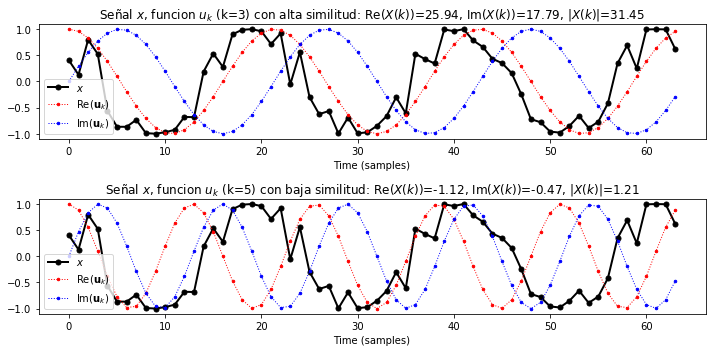

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

N = 64
n = np.arange(N)
k = 3
x = np.cos(2*np.pi*(k*n/N) + 1.2*np.random.rand(N))

plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
plt.plot(n,x,'k',marker='.',markersize='10',linewidth=2.0,label='$x$')
plt.xlabel('Time (samples)')
k = 3
u_k_real = np.cos(2*np.pi*k*n/N)
u_k_imag = np.sin(2*np.pi*k*n/N)
u_k = u_k_real + u_k_imag*1j
sim_complex = np.vdot(u_k,x)
sim_abs = np.abs(sim_complex)
plt.title(r'Señal $x$, funcion $u_k$ (k=3) con alta similitud: Re($X(k)$)=%0.2f, Im($X(k)$)=%0.2f, $|X(k)|$=%0.2f'
          %(sim_complex.real,sim_complex.imag,sim_abs))
plt.plot(n,u_k_real,'r',marker='.',markersize='5',linewidth=1.0,linestyle=':',
         label='$\mathrm{Re}(\mathbf{u}_k)$');
plt.plot(n,u_k_imag,'b',marker='.',markersize='5',linewidth=1.0,linestyle=':',
         label='$\mathrm{Im}(\mathbf{u}_k)$');
plt.legend()

plt.subplot(2,1,2)
plt.plot(n,x,'k',marker='.',markersize='10',linewidth=2.0,label='$x$')
plt.xlabel('Time (samples)')
k = 5
u_k_real = np.cos(2*np.pi*k*n/N)
u_k_imag = np.sin(2*np.pi*k*n/N)
u_k = u_k_real + u_k_imag*1j
sim_complex = np.vdot(u_k,x)
sim_abs = np.abs(sim_complex)
plt.title(r'Señal $x$, funcion $u_k$ (k=5) con baja similitud: Re($X(k)$)=%0.2f, Im($X(k)$)=%0.2f, $|X(k)|$=%0.2f'
          %(sim_complex.real,sim_complex.imag,sim_abs))
plt.plot(n,u_k_real,'r',marker='.',markersize='5',linewidth=1.0,linestyle=':',
         label='$\mathrm{Re}(\mathbf{u}_k)$');
plt.plot(n,u_k_imag,'b',marker='.',markersize='5',linewidth=1.0,linestyle=':',
         label='$\mathrm{Im}(\mathbf{u}_k)$');
plt.legend()

plt.tight_layout()

## Matriz DFT

Siendo un operador lineal $\mathbb{C}^N \to \mathbb{C}^N$, la DFT puede expresarse por medio de una matriz $N\times N$. Esto conduce a definir la matriz $\mathrm{DFT}_N \in \mathbb{C}^{N\times N}$ dada por

$$\mathrm{DFT}_N(n, k) = \mathrm{exp}(-2 \pi i k n / N)$$

para $n\in[0:N-1]$ y $k\in[0:N-1]$. Sea $\rho_N:=\exp(2 \pi i / N)$ una $N$-ésima raiz primitiva de la unidad tal como hemos considerado en el cuaderno <a href="./C2_02_ExponentialFunction.ipynb">Funcion Exponencial</a>. Entonces 

$$\sigma_N:= \overline{\rho_N} = \mathrm{exp}(-2 \pi i / N)$$

tambien define una $N$-ésima raiz primitiva. Teniendo en cuenta las propiedades de las funciones exponenciales, se obtiene

$$ \sigma_N^{kn} = \mathrm{exp}(-2 \pi i / N)^{kn} = \mathrm{exp}(-2 \pi i k n / N)$$

resultando:

$$
\mathrm{DFT}_N =
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \sigma_N & \sigma_N^2 & \dots  & \sigma_N^{N-1} \\
    1 & \sigma_N^2 & \sigma_N^4 & \dots  & \sigma_N^{2(N-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & \sigma_N^{N-1} & \sigma_N^{2(N-1)} & \dots  & \sigma_N^{(N-1)(N-1)} \\
\end{pmatrix}
$$

En la siguiente visualizacion, se muestran las partes real e imaginaria de $\mathrm{DFT}_N$. Notar que la fila $k$-ésima de $\mathrm{DFT}_N$ se corresponde con el vector $\overline{\mathbf{u}_k}$.

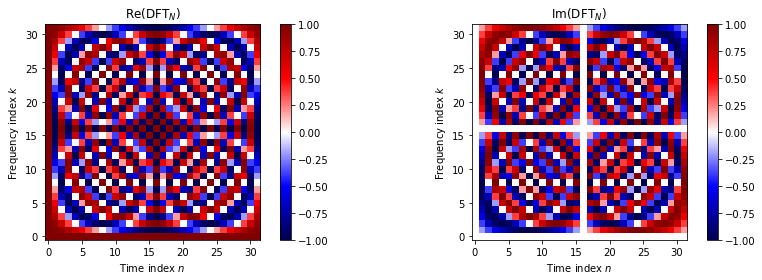

In [4]:
def generate_matrix_dft(N,K):
    """Generate a DFT (discrete Fourier transfrom) matrix
    Args:
        N: Number of samples
        K: Number of frequency bins
    Returns:
        dft: The DFT matrix
    """
    dft = np.zeros((K,N),dtype=np.complex128)
    for n in range(N):
        for k in range(K):
            dft[k,n] = np.exp(-2j*np.pi*k*n/N)
    return dft

N = 32
dft_mat = generate_matrix_dft(N,N)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('$\mathrm{Re}(\mathrm{DFT}_N)$')
plt.imshow(np.real(dft_mat),origin='lower',cmap='seismic',aspect='equal')
plt.xlabel('Time index $n$')
plt.ylabel('Frequency index $k$')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('$\mathrm{Im}(\mathrm{DFT}_N)$')
plt.imshow(np.imag(dft_mat),origin='lower',cmap='seismic',aspect='equal')
plt.xlabel('Time index $n$')
plt.ylabel('Frequency index $k$')
plt.colorbar()
plt.tight_layout()

A continuacion escribimos una funcion que calcula la transformada de Fourier discreta $X = \mathrm{DFT}_N \cdot x$:

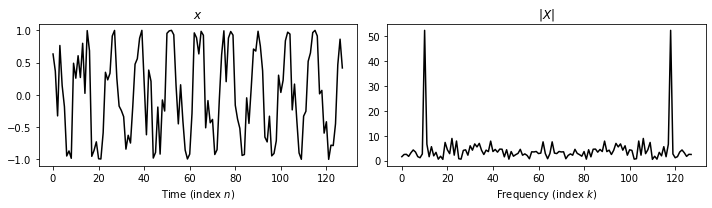

In [5]:
def dft(x):
    """Compute the discrete Fourier transfrom (DFT)
    Args:
        x: Signal to be transformed
    Returns:
        X: Fourier transform of `x`
    """
    x = x.astype(np.complex128)
    N = len(x)
    dft_mat = generate_matrix_dft(N,N)
    return np.dot(dft_mat,x)

N = 128
n = np.arange(N)
k = 10
x = np.cos(2*np.pi*(k*n/N) + 2*(np.random.rand(N)-0.5)) 
X = dft(x)

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('$x$')
plt.plot(x,'k')
plt.xlabel('Time (index $n$)')

plt.subplot(1,2,2)
plt.title('$|X|$')
plt.plot(np.abs(X),'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

## Transformada Rapida de Fourier (FFT)

A continuacion, consideramos la transformada rapida de Fourier (FFT), la cual constituye un algoritmo eficiente para el calculo de la DFT. 
El algoritmo FFT se basa en la observacion de que la aplicacion de una DFT sobre un vector de tamaño par $N=2M$ puede expresarse en terminos de aplicar dos DFTs sobre un vector de tamaño $M$. 
Este algoritmo explota el hecho de que existen relaciones algebraicas entre los elementos $\sigma_N^{kn} = \mathrm{exp}(-2 \pi i / N)^{kn}$ de las matrices DFT. En particular, se tiene 

$$\sigma_M = \sigma_N^2$$

El procedimiento consiste en calcular por una parte la DFT de los valores de la secuencia $x$ correspondientes a los indices pares, y por otra parte la DFT correspondiente a los indices impares:

\begin{align}
(A(0), \dots, A(N/2-1)) & = \mathrm{DFT}_{N/2} \cdot (x(0), x(2), x(4), \dots, x(N-2))\\
(B(0), \dots, B(N/2-1)) & = \mathrm{DFT}_{N/2} \cdot (x(1), x(3), x(5), \dots, x(N-1))
\end{align}

A partir de ambas DFTs de tamaño $N/2$, es factible calcular la DFT global de tamaño $N$ por medio de:

\begin{eqnarray}
C(k) &=& \sigma_N^k \cdot B(k)\\
X(k) &=& A(k) + C(k)\\
X(N/2 + k) &=& A(k) - C(k)\\
\end{eqnarray}

para $k \in [0: N/2 - 1]$. Los numeros $\sigma_N^k$ se designan como *factores de giro* ("twiddle factors"). Si $N$ es potencia de 2, esta idea puede aplicarse de manera recursiva hasta alcanzar el calculo de $\mathrm{DFT}_{1}$ (el caso $N=1$), resultando $X = 1 \cdot x(0)$. Por detalles, referimos a la Seccion 2.4.3 de <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015])</a>.

En el siguiente codigo, ilustramos la funcion `twiddle` que calcula los factores de giro y la funcion `fft` que implementa el algoritmo FFT.

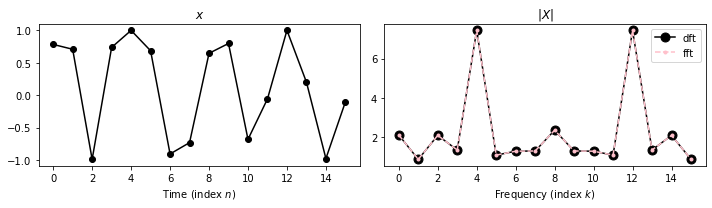

In [6]:
def twiddle(N):
    """Generate twiddle factors used in the computation of the FFT
    Args:
        N: Number of samples
    Returns:
        sigma: The twiddle factors
    """
    k = np.arange(N//2)
    sigma = np.exp(-2j*np.pi*k/N)
    return sigma

def fft(x):
    """Compute the fast Fourier transform (FFT)
    Args:
        x: Signal to be transformed
    Returns:
        X: Fourier transform of `x`
    """
    x = x.astype(np.complex128)
    N = len(x)
    #print('fft has been called with N=%d'%N)
    log2N = np.log2(N) # numero n tal que 2^n=N
    assert log2N == int(log2N), 'N debe ser potencia de 2!'
    X = np.zeros(N,dtype=np.complex128)

    if N == 1:
        return x
    else:
        this_range = np.arange(N)
        indice_par = this_range % 2 == 0 # checks if an index is even
        indice_impar = this_range % 2 == 1 # checks if an index is odd
        A = fft(x[indice_par])
        B = fft(x[indice_impar]) 
        C = twiddle(N) * B
        X[:N//2] = A + C
        X[N//2:] = A - C
        #print('--> intermediate result for N=%d'%N)
        return X

# NOTA:
# The % (modulo) operator yields the remainder from the division of the first
# argument by the second
      
#N = 4
N = 16
n = np.arange(N)
k = 4
x = np.cos(2*np.pi*(k*n/N) + 2*(np.random.rand(N)-0.5)) 
X_via_dft = dft(x)
X_via_fft = fft(x)

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('$x$')
plt.plot(x,'k',marker='.',markersize=12)
plt.xlabel('Time (index $n$)')

plt.subplot(1,2,2)
plt.title('$|X|$')
plt.plot(np.abs(X_via_dft),'k', marker='.',markersize=18,label='dft')
plt.plot(np.abs(X_via_fft),linestyle='--',color='pink',marker='.',markersize=6,label='fft')
plt.xlabel('Frequency (index $k$)')
plt.legend()

plt.tight_layout()

**NOTA:** *Recursive implementation of the FFT* --> Let's have a look at the calculation tree (i.e. the order in which the functions are called) in the case $N=4$.
```
 fft(4)
 │
 ├──── fft(2)
 │     │
 │     ├──── fft(1)
 │     │
 │     └──── fft(1) 
 │     
 └──── fft(2)
       │
       ├──── fft(1)
       │
       └──── fft(1) 
```

# Costo Computacional

La FFT reduce el numero total de operaciones desde un orden $N^2$ (requerido al calcular el producto usual matriz&ndash;vector $\mathrm{DFT}_N \cdot x$) al orden $N\log_2N$. El ahorro en costo computacional es enorme. Por ejemplo, empleando $N=2^{10}=1024$, la FFT requiere $N\log_2N=10240$ en lugar de $N^2=1048576$ operaciones en la aproximacion nativa.

El siguiente codigo compara los tiempos de corrida obtenidos al incrementar el tamaño $N$ para la aproximacion nativa y la FFT:

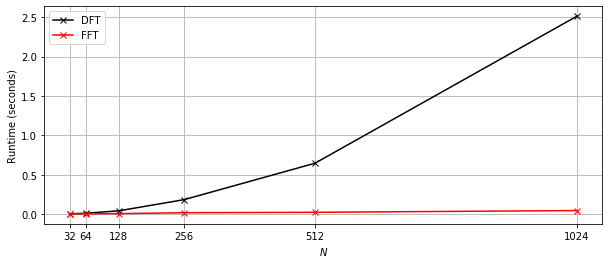

In [7]:
import timeit

Ns = [2**n for n in range(5,11)]
times_dft = []
times_fft = []
runs = 5

for N in Ns:
    n = np.arange(N)
    x = np.sin(2*np.pi*5*n/N)
    
    time_dft = timeit.timeit(lambda: dft(x), number=runs) / runs
    time_fft = timeit.timeit(lambda: fft(x), number=runs) / runs
    times_dft.append(time_dft)
    times_fft.append(time_fft)
    
plt.figure(figsize=(10,4))
    
plt.plot(Ns,times_dft,'-xk',label='DFT')
plt.plot(Ns,times_fft,'-xr',label='FFT')
plt.xticks(Ns)
plt.legend()
plt.grid()
plt.xlabel('$N$')
plt.ylabel('Runtime (seconds)');

## Nota Adicional

Las funciones `dft` y `fft` se han incluido en `LibUNTREF`. En la siguiente celda de codigo, llamamos a estas funciones `LibUNTREF` y estimamos nuevamente los tiempos de corrida.

Timing for DFT: 
658 ms ± 30.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Timing for FFT: 
22.6 ms ± 84.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


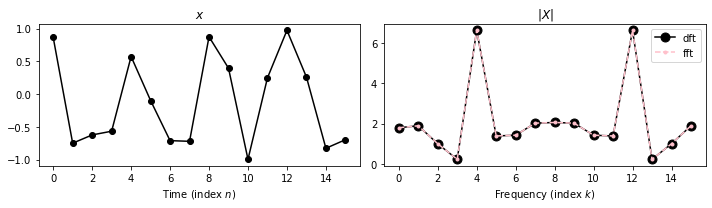

In [8]:
import sys
import os
sys.path.append(os.path.join('..','LibUNTREF'))
import C2_Fourier

N = 16
n = np.arange(N)
k = 4
x = np.cos(2*np.pi*(k*n/N) + 2*(np.random.rand(N)-0.5)) 
X_via_dft = C2_Fourier.dft(x)
X_via_fft = C2_Fourier.fft(x)

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('$x$')
plt.plot(x,'k',marker='.',markersize=12)
plt.xlabel('Time (index $n$)')

plt.subplot(1,2,2)
plt.title('$|X|$')
plt.plot(np.abs(X_via_dft),'k', marker='.',markersize=18,label='dft')
plt.plot(np.abs(X_via_fft),linestyle='--',color='pink',marker='.',markersize=6,label='fft')
plt.xlabel('Frequency (index $k$)')
plt.legend()

plt.tight_layout()

N = 512
n = np.arange(N)
x = np.sin(2*np.pi*5*n/N)

print('Timing for DFT: ')
%timeit C2_Fourier.dft(x)
print('Timing for FFT: ')
%timeit C2_Fourier.fft(x)

In [9]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())